***QUESTION 2***

Use MATLAB or Python to create color contour plots to help a reader visualize internal force and stress fields, under the current design parameters. Create plots of

a. Deflection.

b. y-directed moment per unit length on an x- directed face, Mx.

c. -x-directed moment per unit length on a y-directed face, My.

d. Twisting moment per unit length, Mxy.

e. Shear load per unit length on an x-directed face, Qx.

f. Shear load per unit length on an y-directed face, Qy.

g. Von Mises equivalent stress, svM.

h. Submit a sample of your code for the last contour plot svM) as a separate file.

Label your plots to make them easy to read, clear, and complete (show a legend, identify the variables in the plot (eg x, y, and w for 2a) and units, keep the aspect ratio of the plate realistic,

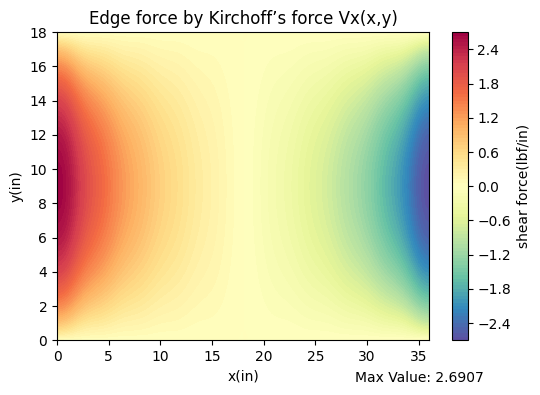

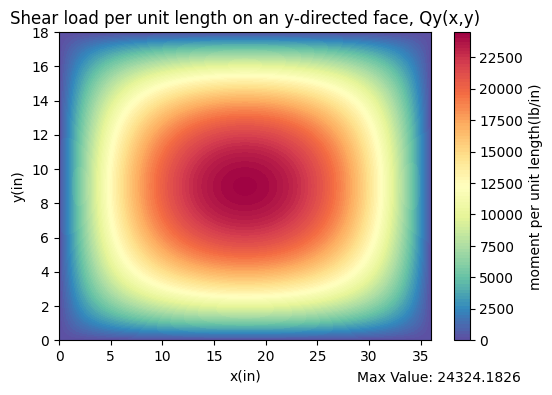

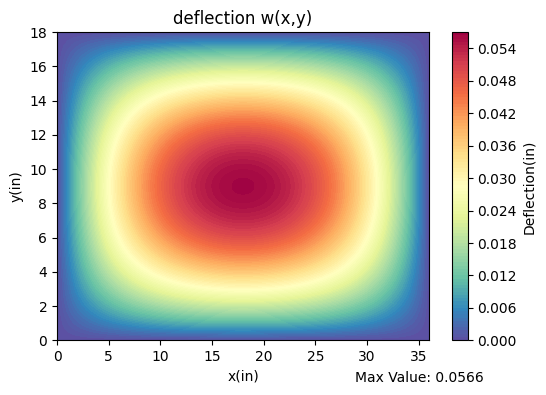

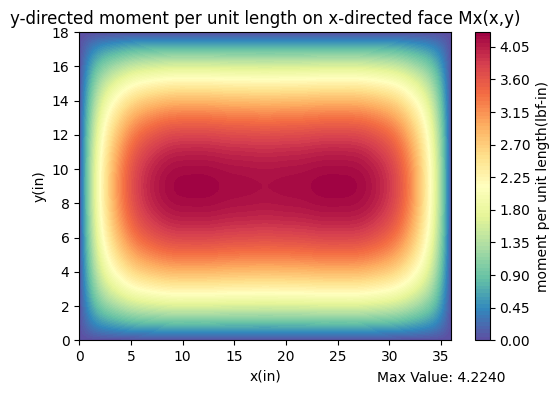

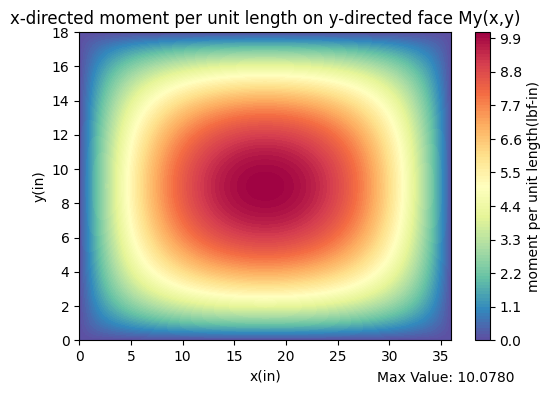

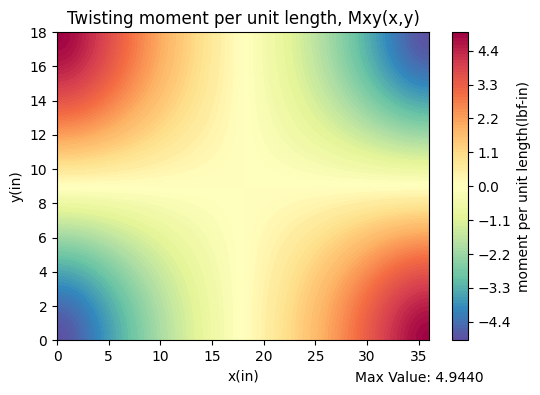

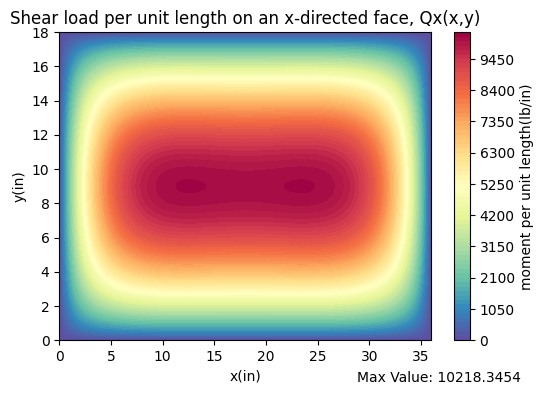

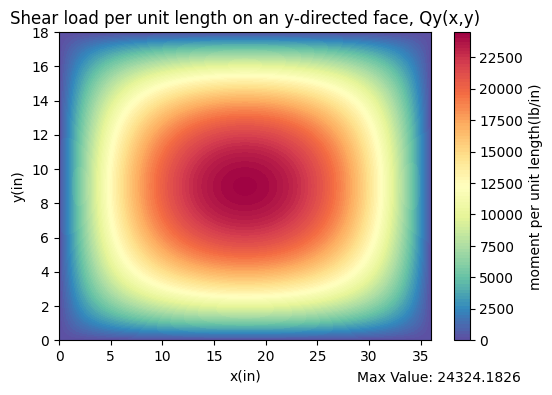

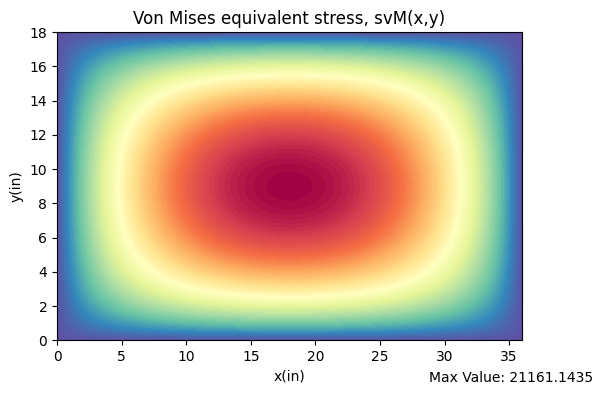

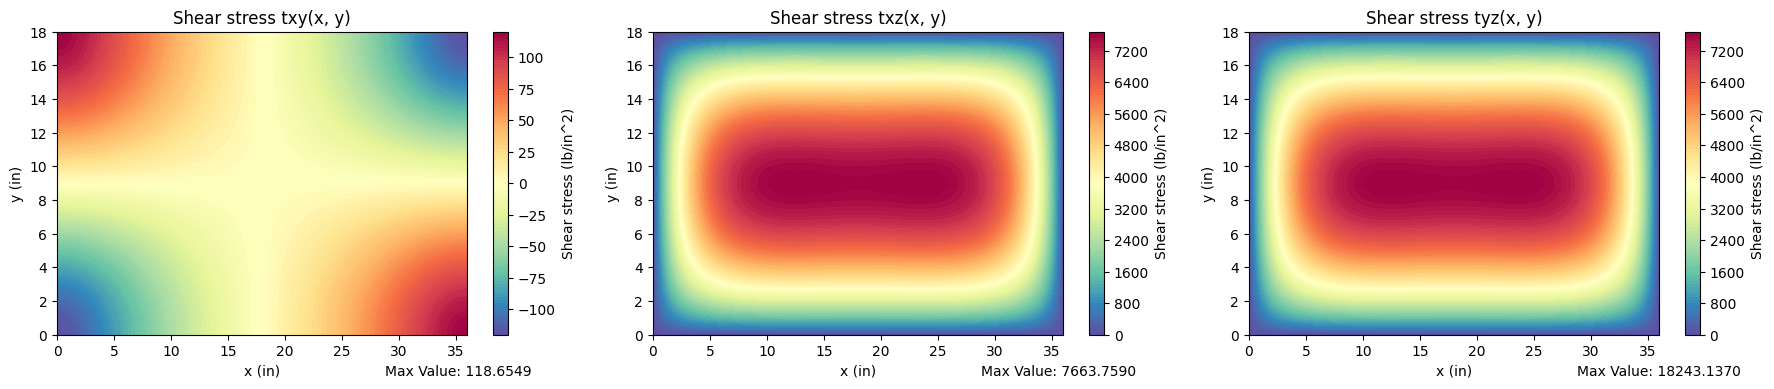

In [49]:
#IMPORT libraries
import matplotlib.pyplot as plt
import numpy as np
import array
#Parameters
#inc = np.ones(21)
a = 36. #in
b = 18. #in
t = .5 # in
A = a*b
p0 = 200/A #lbs
v = 0.25
E = 522000. #psi
D = (E*t**3)/(12*(1-v**2))

X = np.linspace(0, a, 100)           # Return evenly spaced numbers over a specified interval (start, end(length), increments)
Y = np.linspace(0, b, 100)           # Return evenly spaced numbers over a specified interval (start, end(width), increments))
X, Y = np.meshgrid(X, Y)            # Return coordinate matrices from coordinate vectors, X and Y are 2D arrays

#Variable initialization
w = 0 
Vx = 0
mx = 0
my = 0
mxy = 0
qx = 0
qy = 0
txy = 0
txz = 0
tyz = 0



#incrementing the range by 2 helps with keeping the fourier series odd 
for m in range(1,21,2):
  for n in range(1,21,2):

    a_mn = (16 * p0) / (m * n * D * np.pi**2 * ((m * np.pi / a)**2 + (n * np.pi / b)**2)**2)

    #1d, Kirchoff’s force plotting
    max_Vx = np.amax(Vx)
    Vx = Vx + D * a_mn * (((m * np.pi) / a)**3 + (2-v)*((m * np.pi) / a)*((n * np.pi) / b)**2) * np.cos((m * np.pi * X) / a) * np.sin((n * np.pi * Y) / b)

    #a. deflection
    w = w + a_mn*np.sin(m*np.pi*X/a)*np.sin(n*np.pi*Y/b)
    max_w = np.amax(w)

    # b. y-directed moment per unit length on an x- directed face, Mx.
    mx = mx + ((16*p0 * ((m/a)**2 + v*(n/b)**2)) /( m*n*((m*np.pi/a)**2 + (n*np.pi/b)**2)**2)) * np.sin(m*np.pi*X/a)*np.sin(n*np.pi*Y/b) 
    max_mx = np.amax(mx)

    # c. -x-directed moment per unit length on a y-directed face, My.
    my = my + ((16*p0 * (v*(m/a)**2 + (n/b)**2)) /( m*n*((m*np.pi/a)**2 + (n*np.pi/b)**2)**2)) * np.sin(m*np.pi*X/a)*np.sin(n*np.pi*Y/b)
    max_my = np.amax(my) 

    # d. Twisting moment per unit length, Mxy.
    mxy = mxy -a_mn*D*(1-v)*np.pi**2*(m/a)*(n/b)*np.cos(m*np.pi*X/a)*np.cos(n*np.pi*Y/b)
    max_mxy = np.amax(mxy)

    # e. Shear load per unit length on an x-directed face, Qx.
    qx = qx + ((6*mx)/t**2)
    max_qx = np.amax(qx)

    # f. Shear load per unit length on an y-directed face, Qy.
    qy = qy + ((6*my)/t**2)
    max_qy = np.amax(qy)

    #1g, shear force plotting 
    txy = (6*mxy)/t**2
    max_txy = np.amax(txy)
    txz = (3*qx)/2*t 
    max_txz = np.amax(txz) 
    tyz = (3*qy)/2*t
    max_tyz = np.amax(tyz)

    # g. Von Mises equivalent stress, svM.
    svM = np.sqrt(qx**2 + qy **2 - qx*qy + 3*txy**2)
    max_svm = np.amax(svM)

plt.figure(1, figsize=(6, 4)) 
deflection_plt = plt.contourf(X, Y, Vx, 100, cmap='Spectral_r')
plt.title("Edge force by Kirchoff’s force Vx(x,y)")
plt.xlabel("x(in)")
plt.ylabel("y(in)")
plt.colorbar(deflection_plt, label="shear force(lbf/in)")
plt.text(0.8, -0.1, f'Max Value: {max_Vx:.4f}', ha='left', va='top', transform=plt.gca().transAxes)
plt.show()

plt.figure(8, figsize=(6, 4)) 
deflection_plt = plt.contourf(X, Y, qy, 100, cmap='Spectral_r')
plt.title("Shear load per unit length on an y-directed face, Qy(x,y)")
plt.xlabel("x(in)")
plt.ylabel("y(in)")
plt.colorbar(deflection_plt, label="moment per unit length(lb/in)")
plt.text(0.8, -0.1, f'Max Value: {max_qy:.4f}', ha='left', va='top', transform=plt.gca().transAxes)
plt.show()


plt.figure(2, figsize=(6, 4)) 
deflection_plt = plt.contourf(X, Y, w, 100, cmap='Spectral_r')
plt.title("deflection w(x,y)")
plt.xlabel("x(in)")
plt.ylabel("y(in)")
plt.colorbar(deflection_plt, label="Deflection(in)")
plt.text(0.8, -0.1, f'Max Value: {max_w:.4f}', ha='left', va='top', transform=plt.gca().transAxes)
plt.show()

plt.figure(3, figsize=(6, 4)) 
deflection_plt = plt.contourf(X, Y, mx, 100, cmap='Spectral_r')
plt.title("y-directed moment per unit length on x-directed face Mx(x,y)")
plt.xlabel("x(in)")
plt.ylabel("y(in)")
plt.colorbar(deflection_plt, label="moment per unit length(lbf-in)")
plt.text(0.8, -0.1, f'Max Value: {max_mx:.4f}', ha='left', va='top', transform=plt.gca().transAxes)
plt.show()

plt.figure(4, figsize=(6, 4)) 
deflection_plt = plt.contourf(X, Y, my, 100, cmap='Spectral_r')
plt.title("x-directed moment per unit length on y-directed face My(x,y)")
plt.xlabel("x(in)")
plt.ylabel("y(in)")
plt.colorbar(deflection_plt, label="moment per unit length(lbf-in)")
plt.text(0.8, -0.1, f'Max Value: {max_my:.4f}', ha='left', va='top', transform=plt.gca().transAxes)
plt.show()

plt.figure(5, figsize=(6, 4)) 
deflection_plt = plt.contourf(X, Y, mxy, 100, cmap='Spectral_r')
plt.title("Twisting moment per unit length, Mxy(x,y)")
plt.xlabel("x(in)")
plt.ylabel("y(in)")
plt.colorbar(deflection_plt, label="moment per unit length(lbf-in)")
plt.text(0.8, -0.1, f'Max Value: {max_mxy:.4f}', ha='left', va='top', transform=plt.gca().transAxes)
plt.show()

plt.figure(6, figsize=(6, 4)) 
deflection_plt = plt.contourf(X, Y, qx, 100, cmap='Spectral_r')
plt.title("Shear load per unit length on an x-directed face, Qx(x,y)")
plt.xlabel("x(in)")
plt.ylabel("y(in)")
plt.colorbar(deflection_plt, label="moment per unit length(lb/in)")
plt.text(0.8, -0.1, f'Max Value: {max_qx:.4f}', ha='left', va='top', transform=plt.gca().transAxes)
plt.show()

plt.figure(7, figsize=(6, 4)) 
deflection_plt = plt.contourf(X, Y, qy, 100, cmap='Spectral_r')
plt.title("Shear load per unit length on an y-directed face, Qy(x,y)")
plt.xlabel("x(in)")
plt.ylabel("y(in)")
plt.colorbar(deflection_plt, label="moment per unit length(lb/in)")
plt.text(0.8, -0.1, f'Max Value: {max_qy:.4f}', ha='left', va='top', transform=plt.gca().transAxes)
plt.show()

plt.figure(9, figsize=(6, 4))
plt.contourf(X, Y, svM, 100, cmap='Spectral_r')
plt.title("Von Mises equivalent stress, svM(x,y)")
plt.xlabel("x(in)")
plt.ylabel("y(in)")
plt.colorbar(deflection_plt, label="stress(lb/in^2)") 
plt.text(0.8, -0.1, f'Max Value: {max_svm:.4f}', ha='left', va='top', transform=plt.gca().transAxes) 
plt.show()






#-------------------------------------------------------
plt.figure(figsize=(18, 4))

# Plot the first subplot
plt.subplot(1, 3, 1)
deflection_plt = plt.contourf(X, Y, txy, 100, cmap='Spectral_r')
plt.title("Shear stress txy(x, y)")
plt.xlabel("x (in)")
plt.ylabel("y (in)")
plt.colorbar(deflection_plt, label="Shear stress (lb/in^2)")
plt.text(0.8, -0.1, f'Max Value: {max_txy:.4f}', ha='left', va='top', transform=plt.gca().transAxes)

# Plot the second subplot
plt.subplot(1, 3, 2)
# Assuming you have txy and max_txy defined
txy_plt = plt.contourf(X, Y, txz, 100, cmap='Spectral_r')
plt.title("Shear stress txz(x, y)")
plt.xlabel("x (in)")
plt.ylabel("y (in)")
plt.colorbar(txy_plt, label="Shear stress (lb/in^2)")
plt.text(0.8, -0.1, f'Max Value: {max_txz:.4f}', ha='left', va='top', transform=plt.gca().transAxes)

# Plot the third subplot
plt.subplot(1, 3, 3)
# Assuming you have txz, max_txz, tyz, and max_tyz defined
txz_plt = plt.contourf(X, Y, txz, 100, cmap='Spectral_r')
plt.title("Shear stress tyz(x, y)")
plt.xlabel("x (in)")
plt.ylabel("y (in)")
plt.colorbar(txz_plt, label="Shear stress (lb/in^2)")
plt.text(0.8, -0.1, f'Max Value: {max_tyz:.4f}', ha='left', va='top', transform=plt.gca().transAxes)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

